# Assignment 1:
Test whether a gaussian model N($\mu$, $\sigma$) for the age distribution of citibike drivers is a sensible model, or if you can find a better fit with another distribution.

Use 2 tests: KS, AD, KL, chisq (even though we have not talked about it in detail yet) to do this.

Test at the Normal and a least one other distributions (e.g. Poisson, or Binomial, or Chisq, Lognormal.......)

No skeleton: you are on your own!

Extra credit: Divide your sample geographically: by Borrow + split Manhattan in an Uptown and a Downtown sample (use your discretion to do so, but ZIP code is a good idea) and see if you notice any differences in how the age distribution can be modeled.
 

In [2]:
# imports and setups
import pylab as pl
import pandas as pd
import numpy as np
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [3]:
#efining a significant threshold for the whole exercise
alpha = 0.05

# I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. You should use data from multiple months, joining multiple datasets, thus addressing systematic errors as well

In [4]:
datestring6 = '201506' #Using data set for month of June
getCitiBikeCSV(datestring6)
datestring7 = '201507' #Using data set for month of July
getCitiBikeCSV(datestring7)
datestring8 = '201508' #Using data set for month of June
getCitiBikeCSV(datestring8)

file in place, you can continue
file in place, you can continue
file in place, you can continue


In [5]:
df6 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring6 + '-citibike-tripdata.csv')
df7 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring7 + '-citibike-tripdata.csv')
df8 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring8 + '-citibike-tripdata.csv')
joined = [df6, df7, df8]
df1 = pd.concat(joined)
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [6]:
df1.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,3.205939e+06,3.205939e+06,3.205939e+06,3.205939e+06,3.205939e+06,3.205939e+06,3.205939e+06,3.205939e+06,2.674181e+06,3.205939e+06
mean,9.674724e+02,4.818940e+02,4.073466e+01,-7.399113e+01,4.808549e+02,4.073434e+01,-7.399122e+01,1.917488e+04,1.976707e+03,1.033359e+00
std,6.918156e+03,4.538632e+02,1.947244e-02,1.286754e-02,4.542648e+02,1.949034e-02,1.289033e-02,2.688411e+03,1.141686e+01,6.048311e-01
min,6.000000e+01,7.200000e+01,4.067891e+01,-7.401713e+01,7.200000e+01,4.067891e+01,-7.401713e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,4.100000e+02,3.060000e+02,4.072083e+01,-7.400150e+01,3.050000e+02,4.072066e+01,-7.400155e+01,1.685200e+04,NaN,1.000000e+00
50%,6.650000e+02,4.150000e+02,4.073625e+01,-7.399099e+01,4.110000e+02,4.073588e+01,-7.399099e+01,1.914500e+04,NaN,1.000000e+00
75%,1.107000e+03,4.940000e+02,4.075020e+01,-7.398195e+01,4.920000e+02,4.074972e+01,-7.398195e+01,2.152500e+04,NaN,1.000000e+00
max,5.174309e+06,3.224000e+03,4.077164e+01,-7.392989e+01,3.224000e+03,4.077706e+01,-7.392989e+01,2.435600e+04,1.999000e+03,2.000000e+00


In [7]:
# df is the dataframe where the content of the csv file is stored
df1['date'] = pd.to_datetime(df1['starttime'])
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,2015-06-01 00:00:00
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,2015-06-01 00:00:00
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1,2015-06-01 00:01:00
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1,2015-06-01 00:01:00
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0,2015-06-01 00:02:00


In [8]:
df1.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,3.205939e+06,3.205939e+06,3.205939e+06,3.205939e+06,3.205939e+06,3.205939e+06,3.205939e+06,3.205939e+06,2.674181e+06,3.205939e+06
mean,9.674724e+02,4.818940e+02,4.073466e+01,-7.399113e+01,4.808549e+02,4.073434e+01,-7.399122e+01,1.917488e+04,1.976707e+03,1.033359e+00
std,6.918156e+03,4.538632e+02,1.947244e-02,1.286754e-02,4.542648e+02,1.949034e-02,1.289033e-02,2.688411e+03,1.141686e+01,6.048311e-01
min,6.000000e+01,7.200000e+01,4.067891e+01,-7.401713e+01,7.200000e+01,4.067891e+01,-7.401713e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,4.100000e+02,3.060000e+02,4.072083e+01,-7.400150e+01,3.050000e+02,4.072066e+01,-7.400155e+01,1.685200e+04,NaN,1.000000e+00
50%,6.650000e+02,4.150000e+02,4.073625e+01,-7.399099e+01,4.110000e+02,4.073588e+01,-7.399099e+01,1.914500e+04,NaN,1.000000e+00
75%,1.107000e+03,4.940000e+02,4.075020e+01,-7.398195e+01,4.920000e+02,4.074972e+01,-7.398195e+01,2.152500e+04,NaN,1.000000e+00
max,5.174309e+06,3.224000e+03,4.077164e+01,-7.392989e+01,3.224000e+03,4.077706e+01,-7.392989e+01,2.435600e+04,1.999000e+03,2.000000e+00


In [9]:
#df is the dataframe where the content of the csv file is stored
df1['age'] = 2015 - df1['birth year']


In [10]:
#dropping some data I no longer need
#... your code here...
df1 = df1[['tripduration', 'date', 'age', 'start station latitude', 'start station longitude']]
df1.head()

,tripduration,date,age,start station latitude,start station longitude
0,1338,2015-06-01 00:00:00,31.0,40.727103,-74.002971
1,290,2015-06-01 00:00:00,18.0,40.727791,-73.985649
2,634,2015-06-01 00:01:00,22.0,40.735238,-74.000271
3,159,2015-06-01 00:01:00,34.0,40.716059,-73.991908
4,1233,2015-06-01 00:02:00,NaN,40.734927,-73.992005


In [11]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df1.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,age,start station latitude,start station longitude
count,3.205939e+06,2.674181e+06,3.205939e+06,3.205939e+06
mean,9.674724e+02,3.829291e+01,4.073466e+01,-7.399113e+01
std,6.918156e+03,1.141686e+01,1.947244e-02,1.286754e-02
min,6.000000e+01,1.600000e+01,4.067891e+01,-7.401713e+01
25%,4.100000e+02,NaN,4.072083e+01,-7.400150e+01
50%,6.650000e+02,NaN,4.073625e+01,-7.399099e+01
75%,1.107000e+03,NaN,4.075020e+01,-7.398195e+01
max,5.174309e+06,1.300000e+02,4.077164e+01,-7.392989e+01


In [12]:
# dropping NaN values
df1.dropna(inplace= True)
df1.describe()

,tripduration,age,start station latitude,start station longitude
count,2.674181e+06,2.674181e+06,2.674181e+06,2.674181e+06
mean,8.004048e+02,3.829291e+01,4.073496e+01,-7.399094e+01
std,4.881208e+03,1.141686e+01,1.891835e-02,1.252239e-02
min,6.000000e+01,1.600000e+01,4.067891e+01,-7.401713e+01
25%,3.810000e+02,2.900000e+01,4.072185e+01,-7.399995e+01
50%,5.990000e+02,3.600000e+01,4.073650e+01,-7.399076e+01
75%,9.540000e+02,4.600000e+01,4.075002e+01,-7.398195e+01
max,3.611666e+06,1.300000e+02,4.077164e+01,-7.392989e+01


In [13]:
df1.head()

,tripduration,date,age,start station latitude,start station longitude
0,1338,2015-06-01 00:00:00,31.0,40.727103,-74.002971
1,290,2015-06-01 00:00:00,18.0,40.727791,-73.985649
2,634,2015-06-01 00:01:00,22.0,40.735238,-74.000271
3,159,2015-06-01 00:01:00,34.0,40.716059,-73.991908
5,690,2015-06-01 00:03:00,39.0,40.739017,-74.002638


lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

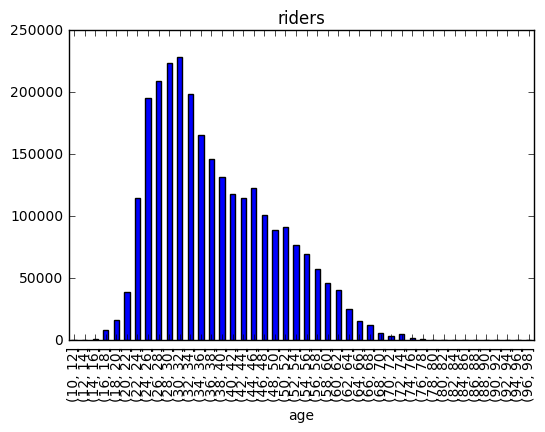

In [32]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 100, 2)
ax = df1.age.groupby(pd.cut(df1.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
ax.set_title("riders")



(array([  8.63100000e+03,   1.59980000e+04,   3.89670000e+04,
          2.07670000e+05,   2.03319000e+05,   2.15600000e+05,
          2.30211000e+05,   3.12645000e+05,   1.65819000e+05,
          1.46308000e+05,   1.93590000e+05,   1.12512000e+05,
          1.21547000e+05,   1.10576000e+05,   1.37470000e+05,
          9.09670000e+04,   7.65360000e+04,   9.98730000e+04,
          5.24580000e+04,   4.22410000e+04,   3.19510000e+04,
          2.78030000e+04,   1.26940000e+04,   6.06400000e+03,
          3.53800000e+03,   6.37000000e+03,   8.68000000e+02,
          3.99000000e+02,   3.15000000e+02,   2.19000000e+02,
          1.00000000e+01,   7.00000000e+00,   3.10000000e+01,
          4.00000000e+00,   4.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   1.80000000e+01,   0.00000000e+00,
          5.40000000e+01,   1.60000000e+01,   0.00000000e+00,
          6.60000000e+01,   5.66000000e+02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

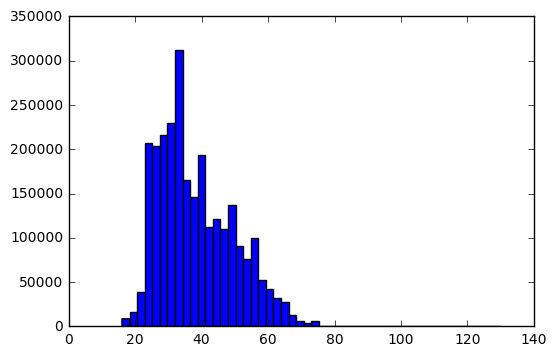

In [25]:
pl.hist(df1.age, 50)

In [73]:
from scipy import stats

# Gaussian model

## Null Hypothesis: The age distribution of CitiBike riders is a Gaussian model.
# alpha = 0.05

Ho: 

Normal mean:  38.2929065011
Standard deviation:  11.4168542392


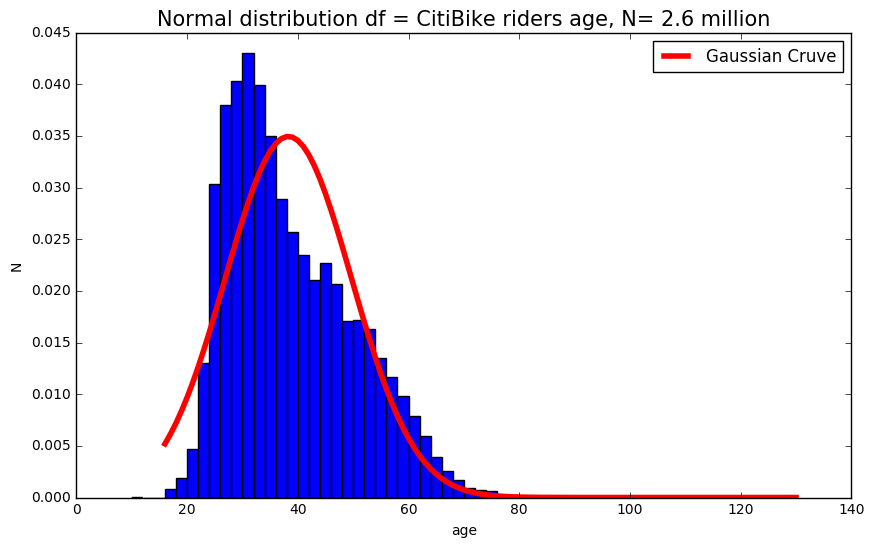

In [70]:
import scipy.stats as stats 
# Code adapted from http://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib
hg = sorted(df1.age)
fitg = stats.norm.pdf(hg, np.mean(hg), np.std(hg)) 

#Ploting the histogram and Gaussian 
pl.figure(figsize=(10, 6))
pl.hist(df1.age, bins, normed = 1)
pl.plot( hg, fitg, linewidth = 4, color = 'red', label = 'Gaussian Cruve')
pl.ylabel('N')
pl.xlabel('age')
pl.title('Normal distribution df = CitiBike riders age, N= 2.6 million', size = 15) 
pl.legend()
print ('Normal mean: ', np.mean(df1.age))
print ('Standard deviation: ', np.std(df1.age))

In [71]:
#Critical values for the Kolmogorov-Smirnov Test for goodness of fit
d_table = 1.358 / (np.sqrt(np.size(df1.age))) #http://www.mathematik.uni-kl.de/~schwaar/Exercises/Tabellen/table_kolmogorov.pdf
#KS Test
ksg = stats.kstest(df1.age, 'norm', args=(df1.age.mean(), df1.age.std()))
print ('Gaussian on CitiBike age distribution ', ksg)
print ('Since the KS-Test returned pvalue as ', ksg[1], ' which is less the alpha=0.05, therefore Null hypothesis is rejected')
print ('Since D-statistic is ', ksg[0], ' which is higher than critical value of ', d_table, ' for p=0.95, therefore Null is rejected')

Gaussian on CitiBike age distribution  KstestResult(statistic=0.10763811620463215, pvalue=0.0)
Since the KS-Test returned pvalue as  0.0  which is less the alpha=0.05, therefore Null hypothesis is rejected
Since D-statistic is  0.107638116205  which is higher than critical value of  0.000830432563184  for p=0.95, therefore Null is rejected


In [72]:
#Adderson Test
adg = stats.anderson(df1.age, dist='norm')
print ('Gaussian on CitiBike age distribution ', adg)


Gaussian on CitiBike age distribution  AndersonResult(statistic=41623.785302308854, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


Since AD test result returned statistic as 41623.78, which is higher that critical_value of 1.092, therefore its significance_level is less than 1% meaning the null is rejected.

# Poisson model

## Null Hypothesis: The age distribution of CitiBike riders is a Poisson model.
# alpha = 0.05

Ho: 

Normal mean:  38.2929065011
Standard deviation:  11.4168542392


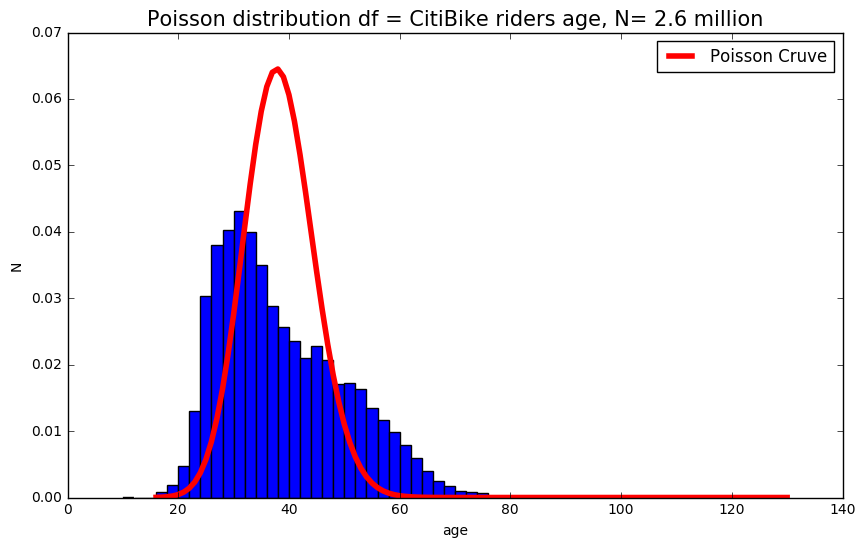

In [74]:
hp = sorted(df1.age)
fitp = stats.poisson.pmf(hp, np.mean(hp)) 

#Ploting the histogram and Poisson 
pl.figure(figsize=(10, 6))
pl.hist(df1.age, bins, normed=True)
pl.plot( hp, fitp, linewidth = 4, color = 'red', label = 'Poisson Cruve')
pl.ylabel('N')
pl.xlabel('age')
pl.title('Poisson distribution df = CitiBike riders age, N= 2.6 million', size = 15) 
pl.legend()
print ('Normal mean: ', np.mean(df1.age))
print ('Standard deviation: ', np.std(df1.age))

In [76]:
#Critical values for the Kolmogorov-Smirnov Test for goodness of fit
p_table = 0.75 / (np.sqrt(np.size(df1.age))) #http://www.mathematik.uni-kl.de/~schwaar/Exercises/Tabellen/table_kolmogorov.pdf
#KS Test
ksp = stats.kstest(df1.age, 'poisson', args=(df1.age.mean(), df1.age.std()))
print ('Poisson on CitiBike age distribution ', ksp)
print ('Since the KS-Test returned pvalue as ', ksp[1], ' which is less the alpha=0.05, therefore Null hypothesis is rejected')
print ('Since D-statistic is ', ksp[0], ' which is higher than critical value of ', p_table, ' for p=0.95, therefore Null is rejected')

Poisson on CitiBike age distribution  KstestResult(statistic=0.57710295466578965, pvalue=0.0)
Since the KS-Test returned pvalue as  0.0  which is less the alpha=0.05, therefore Null hypothesis is rejected
Since D-statistic is  0.577102954666  which is higher than critical value of  0.000458633595278  for p=0.95, therefore Null is rejected


In [87]:
#Chisquare Test
chqp = stats.chisquare(df1.age)
print ('Poisson on CitiBike age distribution ', chqp)

Poisson on CitiBike age distribution  Power_divergenceResult(statistic=9102598.3551637754, pvalue=0.0)


# Log model

## Null Hypothesis: The age distribution of CitiBike riders is a Log model.
# alpha = 0.05

Ho: 

log mean:  1.56464305749
Standard deviation:  0.126005763343


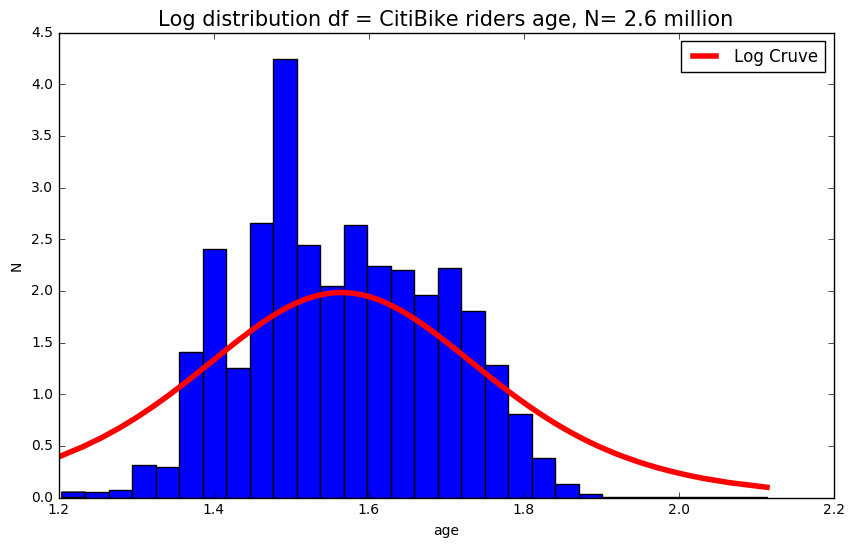

In [93]:
hl = sorted(np.log10(df1.age))
fitl = stats.logistic.pdf(hl, np.mean(hl), np.std(hl)) 

#Ploting the histogram and Log distribution
pl.figure(figsize=(10, 6))
pl.hist(np.log10(df1.age), 30, normed = 1)
pl.plot( hl, fitl, linewidth = 4, color = 'red', label = 'Log Cruve')
pl.ylabel('N')
pl.xlabel('age')
pl.title('Log distribution df = CitiBike riders age, N= 2.6 million', size = 15) 
pl.legend()
print ('log mean: ', np.mean(np.log10(df1.age)))
print ('Standard deviation: ', np.std(np.log10(df1.age)))

Mean:  38.2929065011
Standard deviation:  11.4168542392


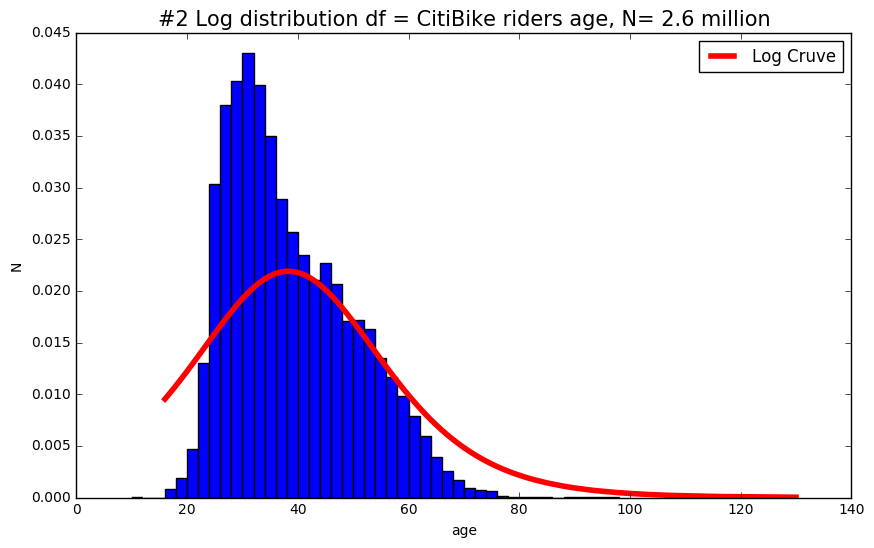

In [124]:
hlo = sorted(df1.age)
fitlo = stats.logistic.pdf(hlo, np.mean(hlo), np.std(hlo)) 

#Ploting the histogram and Log distribution 
pl.figure(figsize=(10, 6))
pl.hist(df1.age, bins, normed = 1)
pl.plot( hlo, fitlo, linewidth = 4, color = 'red', label = 'Log Cruve')
pl.ylabel('N')
pl.xlabel('age')
pl.title('#2 Log distribution df = CitiBike riders age, N= 2.6 million', size = 15) 
pl.legend()
print ('Mean: ', np.mean(df1.age))
print ('Standard deviation: ', np.std(df1.age))

In [97]:
#KS Test
ksl = stats.kstest(df1.age, 'logistic', args=(df1.age.mean(), df1.age.std()))
print ('Log on CitiBike age distribution ', ksl)
print ('Since the KS-Test returned pvalue as ', ksl[1], ' which is less the alpha=0.05, therefore Null hypothesis is rejected')
print ('Since D-statistic is ', ksl[0], ' which is higher than critical value of for p=0.95, therefore Null is rejected')

Log on CitiBike age distribution  KstestResult(statistic=0.18381041404003559, pvalue=0.0)
Since the KS-Test returned pvalue as  0.0  which is less the alpha=0.05, therefore Null hypothesis is rejected
Since D-statistic is  0.18381041404  which is higher than critical value of for p=0.95, therefore Null is rejected


In [98]:
#Adderson Test
adl = stats.anderson(df1.age, dist='logistic')
print ('Log on CitiBike age distribution ', adl)


Log on CitiBike age distribution  AndersonResult(statistic=38453.292787634768, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))


# Beta model.

## Visually it seems the best fit but I don't know which test to use to check its goodness of fit

Mean:  38.2929065011
Standard deviation:  11.4168542392


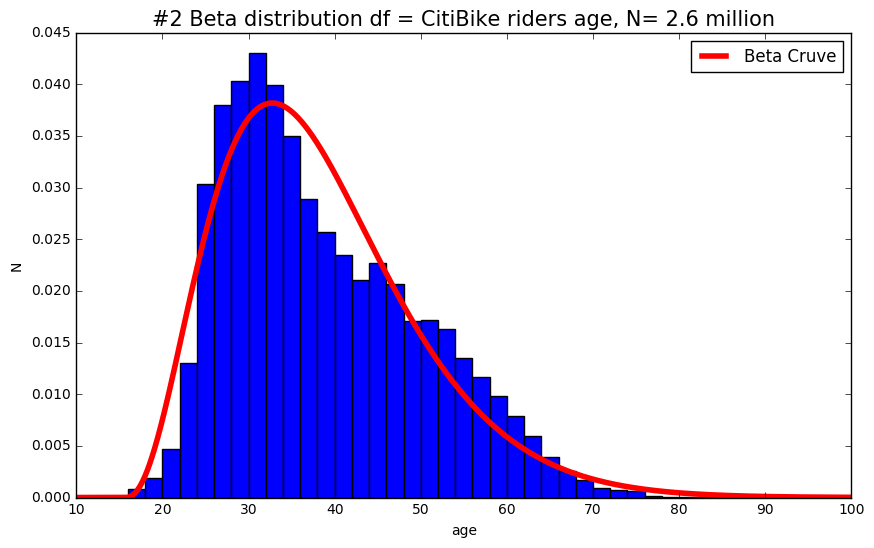

In [148]:
hb = df1.age

#Ploting the histogram  
pl.figure(figsize=(10, 6))
pl.hist(df1.age, bins, normed = 1)

# find minimum and maximum of xticks, so I know where we should compute theoretical distribution
#Adpated from http://danielhnyk.cz/fitting-distribution-histogram-using-python/
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(hb))
# computing the beta model
ab,bb,cb,db = stats.beta.fit(hb)  
fitb = stats.beta.pdf(lnspc, ab, bb,cb, db)  

# Ploting the beta model
pl.plot( lnspc, fitb, linewidth = 4, color = 'red', label = 'Beta Cruve')
pl.ylabel('N')
pl.xlabel('age')
pl.title('#2 Beta distribution df = CitiBike riders age, N= 2.6 million', size = 15) 
pl.legend()

print ('Mean: ', np.mean(df1.age))
print ('Standard deviation: ', np.std(df1.age))

In [147]:
#KS Test... just checking
ksb = stats.kstest(df1.age, 'beta', args=(df1.age.mean(), df1.age.std()))
print ('Log on CitiBike age distribution ', ksb)
print ('Since the KS-Test returned pvalue as ', ksb[1], ' which is less the alpha=0.05, therefore Null hypothesis is rejected')
print ('Since D-statistic is ', ksb[0], ' which is higher than critical value of for p=0.95, therefore Null is rejected')

Log on CitiBike age distribution  KstestResult(statistic=1.0, pvalue=0.0)
Since the KS-Test returned pvalue as  0.0  which is less the alpha=0.05, therefore Null hypothesis is rejected
Since D-statistic is  1.0  which is higher than critical value of for p=0.95, therefore Null is rejected
